In [2]:
from collections import Counter
import cv2
import os
import glob
import skimage
import numpy as np
import pandas as pd
import seaborn as sn
#import preprocessing
from tqdm import tqdm
from io import BytesIO
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
from imageio import imread
from skimage.transform import resize
from collections import Counter
import IPython.display as display

sn.set()

from sklearn.svm import SVC # SVC
from sklearn import metrics
from sklearn.utils import shuffle
from xgboost import XGBClassifier # XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import compute_class_weight
from sklearn.preprocessing import MinMaxScaler,LabelBinarizer
from sklearn.ensemble import AdaBoostClassifier # AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import os
from tqdm import tqdm
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
# input data yang di peroleh di data momography
train_path = "E:/APK for B Cancer/train/"
test_path = "E:/APK for B Cancer/test/"

In [7]:
# Take the number class
numberOfClass = len(glob(train_path+"/*")) 
print("Number of Class: ",numberOfClass)

Number of Class:  4


In [8]:
labels = ['benign','bwc','cancer','normal']

In [10]:
X_train_1 = []
y_train_1 = []
image_size = 100
for i in labels:
    folderPath = os.path.join('E:/APK for B Cancer/train/',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(image_size, image_size))
        X_train_1.append(img)
        y_train_1.append(i)
        
for i in labels:
    folderPath = os.path.join('E:/APK for B Cancer/test/',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(image_size,image_size))
        X_train_1.append(img)
        y_train_1.append(i)
        
X_train_1 = np.array(X_train_1)
y_train_1 = np.array(y_train_1)

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [03:33<00:00,  3.00it/s]


In [11]:
X_train_1, y_train_1 = shuffle(X_train_1, y_train_1 , random_state=101)

In [12]:
y_train_1_new = []
for i in y_train_1:
    y_train_1_new.append(labels.index(i))
y_train_1_new = y_train_1_new
y_train_1_new = tf.keras.utils.to_categorical(y_train_1_new)

In [13]:
import keras
from importlib import reload
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
reload(keras.models)

rows, cols,color = X_train_1[0].shape
# print(x_train[0].shape)

base_model = VGG16(input_shape= X_train_1[0].shape , weights='imagenet', include_top=False)
model=Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='sigmoid'))

for layer in base_model.layers:
    layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 4608)              18432     
_________________________________________________________________
dense (Dense)                (None, 64)                294976    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
activation (Activation)      (None, 64)                0

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', patience=6,restore_best_weights=True, verbose=1)

In [15]:
efficientNet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(100,100,3))

In [20]:
x_train = X_train_1
y_train = y_train_1_new

In [25]:
model = efficientNet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=efficientNet.input, outputs = model)

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam', 
              metrics= ['accuracy'])

In [27]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("CovidModelEfficientNet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', 
                              factor = 0.3, 
                              patience = 2, 
                              min_delta = 0.001,
                              mode='auto',verbose=1)

In [28]:
hist = model.fit(x_train,
                 y_train,
                 validation_split=0.1, 
                 epochs =64, 
                 verbose=1, 
                 batch_size=64,
                  callbacks=[tensorboard,checkpoint,reduce_lr]
                 )

Epoch 1/64
106/106 [==============================] - 99s 637ms/step - loss: 0.8745 - accuracy: 0.6237 - val_loss: 0.9007 - val_accuracy: 0.6693

Epoch 00001: val_accuracy improved from -inf to 0.66932, saving model to CovidModelEfficientNet.h5
Epoch 2/64
106/106 [==============================] - 63s 592ms/step - loss: 0.6264 - accuracy: 0.7308 - val_loss: 1.2262 - val_accuracy: 0.5870

Epoch 00002: val_accuracy did not improve from 0.66932
Epoch 3/64
106/106 [==============================] - 63s 592ms/step - loss: 0.5064 - accuracy: 0.7894 - val_loss: 0.7628 - val_accuracy: 0.7278

Epoch 00003: val_accuracy improved from 0.66932 to 0.72776, saving model to CovidModelEfficientNet.h5
Epoch 4/64
106/106 [==============================] - 62s 590ms/step - loss: 0.4085 - accuracy: 0.8302 - val_loss: 0.9321 - val_accuracy: 0.6693

Epoch 00004: val_accuracy did not improve from 0.72776
Epoch 5/64
106/106 [==============================] - 62s 589ms/step - loss: 0.3270 - accuracy: 0.8717 - 


Epoch 00035: val_accuracy did not improve from 0.82072
Epoch 36/64
106/106 [==============================] - 63s 593ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.9764 - val_accuracy: 0.8141

Epoch 00036: val_accuracy did not improve from 0.82072

Epoch 00036: ReduceLROnPlateau reducing learning rate to 1.7714700373261393e-09.
Epoch 37/64
106/106 [==============================] - 63s 594ms/step - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.9785 - val_accuracy: 0.8127

Epoch 00037: val_accuracy did not improve from 0.82072
Epoch 38/64
106/106 [==============================] - 64s 608ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.9778 - val_accuracy: 0.8127

Epoch 00038: val_accuracy did not improve from 0.82072

Epoch 00038: ReduceLROnPlateau reducing learning rate to 5.314410245205181e-10.
Epoch 39/64
106/106 [==============================] - 64s 605ms/step - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.9778 - val_accuracy: 0.8127

Epoch 00039: val_accuracy di

In [29]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


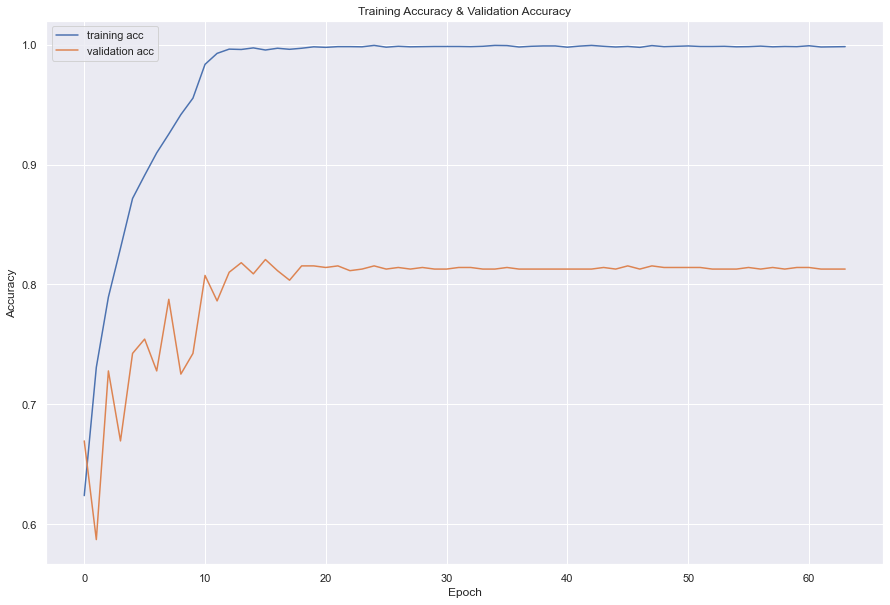

In [31]:
plt.figure(figsize=(15,10))
plt.plot(hist.history["accuracy"],label = "training acc")
plt.plot(hist.history["val_accuracy"],label = "validation acc")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()